In [1]:
library(MatchIt)
library(survival)
library(survminer)
library(tidyr)
library(tableone)
library(plotRCS)
library(rms)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma



Attaching package: ‘plotRCS’


The following object is masked from ‘package:survival’:

    cancer


Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




In [2]:
Pvalue_cut = 0.05

In [3]:
df_survival <- read.csv("df_diuretic_responsitive.csv",as.is = TRUE)
df_survival <- as.data.frame(df_survival)
#df_survival$groupHPD <- as.factor(df_survival$groupHPD)
df_select <-  df_survival
# df_select <-  df_survival[df_survival$groupHPD==1,] 
#df_select <-  df_survival[df_survival$groupHPD==2,] 
#df_select <-  df_survival[df_survival$groupHPD==3,] 


# univariate

In [ ]:
# Covariate Setting:
# demo
# Organ disorders: Kidneys, other organs
covariates <- c('creatinine', 'urineoutput', 'baseline_Scr',
       'colloid_bolus', 'sofa_norenal', 'Congestive_heart_failure', 'weight',
       'age', 'gender', 'height',
       'aniongap', 'pt', 'sbp',  'cum_fluidbance',  
       'baseexcess', 'hemoglobin', 
       'fluidbance',  'gcs', 'mbp', 'potassium', 'spo2',
        'bicarbonate', 'sodium',
       'temperature',  'po2', 'ptt', 'glucose', 'pco2', 'chloride',
       'rbc', 'wbc', 'ph', 'mchc', 'mcv', 'hematocrit',
         'heart_rate', 'fio2',
       'resp_rate',  'dbp', 'mch', 
       'lactate', 'rdw', 'calcium' 
          #       'respiration_sofa', 'cardiovascular_sofa','cns_sofa','coagulation_sofa','liver_sofa', 'renal_sofa', 'sofa',
                )


univ_formulas <- sapply(covariates,function(x) as.formula(paste('Surv(survival_28day, mortality_28d)~', x)))

univ_models <- lapply( univ_formulas, function(x){coxph(x, data = df_select)})

univ_results <- lapply(univ_models,
                       function(x){ 
                          x <- summary(x)
                          p.value<-signif(x$wald["pvalue"], digits=2)
                          wald.test<-signif(x$wald["test"], digits=2)
                          beta<-signif(x$coef[1], digits=2);#coeficient beta
                          HR <-signif(x$coef[2], digits=2);#exp(beta)
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"],2)
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                          HR <- paste0(HR, " (", 
                                       HR.confint.lower, "-", HR.confint.upper, ")")
                          res<-c(beta, HR, wald.test, p.value)
                          names(res)<-c("beta", "HR (95% CI for HR)","wald.test", "p.value")
                          return(res)
                          #return(exp(cbind(coef(x),confint(x))))
                         })
res <- t(as.data.frame(univ_results, check.names = FALSE))
res <- as.data.frame(res)
res

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”


,beta,HR (95% CI for HR),wald.test,p.value
,<chr>,<chr>,<chr>,<chr>
creatinine,0.28,1.3 (1.2-1.5),17,3.6e-05
urineoutput,-0.00031,1 (1-1),29,5.6e-08
baseline_Scr,0.3,1.4 (0.96-1.9),3,0.082
colloid_bolus,7.7e-05,1 (1-1),22,2.9e-06
sofa_norenal,0.18,1.2 (1.2-1.2),190,8.1e-44
Congestive_heart_failure,0.64,1.9 (0.9-4),2.8,0.091
weight,-0.017,0.98 (0.98-0.99),25,5.6e-07
age,0.019,1 (1-1),37,1.3e-09
gender,-0.1,0.9 (0.77-1.1),1.5,0.22


## p value of 0.05 was used to screen covariates

In [ ]:
res$p.value <- as.numeric(res$p.value)
print(paste0("Total number of variables:",dim(res)[1]))
print(paste0("The number of variables after p-value filtering:",dim(res[res$p.value <= Pvalue_cut,])[1]))

resstr <- paste(rownames(res[res$p.value <= Pvalue_cut,]), collapse = " + ")
resstr <- paste("Surv(survival_28day, mortality_28d) ~ +", resstr)
resstr

# multivariate

In [6]:
res.cox <- coxph(as.formula(resstr), data = df_select)
summary(res.cox)

Call:
coxph(formula = as.formula(resstr), data = df_select)

  n= 2183, number of events= 545 

                     coef  exp(coef)   se(coef)      z Pr(>|z|)    
creatinine     -1.476e-01  8.628e-01  9.488e-02 -1.555 0.119860    
urineoutput    -1.821e-04  9.998e-01  1.148e-04 -1.586 0.112644    
colloid_bolus   8.526e-05  1.000e+00  9.762e-05  0.873 0.382436    
sofa_norenal    1.334e-01  1.143e+00  1.613e-02  8.270  < 2e-16 ***
weight         -1.571e-02  9.844e-01  4.149e-03 -3.787 0.000152 ***
age             2.491e-02  1.025e+00  3.395e-03  7.335 2.21e-13 ***
height          1.078e-02  1.011e+00  5.792e-03  1.861 0.062736 .  
aniongap        3.996e-03  1.004e+00  1.279e-02  0.313 0.754654    
pt              4.727e-03  1.005e+00  3.439e-03  1.374 0.169320    
sbp            -7.564e-03  9.925e-01  5.228e-03 -1.447 0.147960    
cum_fluidbance -1.064e-04  9.999e-01  1.002e-04 -1.062 0.288307    
hemoglobin      3.057e-02  1.031e+00  1.715e-02  1.783 0.074628 .  
fluidbance          

In [ ]:
# merge
mul_cox <- summary(res.cox)
mul_HR<- round(mul_cox$coefficients[,2],2) 
mul_Pvalue<- mul_cox$coefficients[,5] #round(mul_cox$coefficients[,5],4) 
mul_CI5<-round(mul_cox$conf.int[,3],2)
mul_CI95<-round(mul_cox$conf.int[,4],2)
mul_CI<-paste0(mul_HR,' (',mul_CI5,'-',mul_CI95,')')
Variable<-row.names(data.frame(mul_cox$coefficients))
mulcox_res<- data.frame(Variable,mul_HR,mul_CI5,mul_CI95,mul_CI,mul_Pvalue)
colnames(mulcox_res)=c("Variable","HR","CI5","CI95","HR (95% CI)","Pvalue")
mulcox_res$Pvalue <- sapply(mulcox_res$Pvalue, function(x) sprintf("%.2e", x))
mulcox_res$Pvalue <- as.numeric(mulcox_res$Pvalue)
View(mulcox_res)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,Variable,HR,CI5,CI95,HR (95% CI),Pvalue
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
creatinine,creatinine,0.86,0.72,1.04,0.86 (0.72-1.04),1.20e-01
urineoutput,urineoutput,1.00,1.00,1.00,1 (1-1),1.13e-01
colloid_bolus,colloid_bolus,1.00,1.00,1.00,1 (1-1),3.82e-01
sofa_norenal,sofa_norenal,1.14,1.11,1.18,1.14 (1.11-1.18),1.34e-16
weight,weight,0.98,0.98,0.99,0.98 (0.98-0.99),1.52e-04
age,age,1.03,1.02,1.03,1.03 (1.02-1.03),2.21e-13
height,height,1.01,1.00,1.02,1.01 (1-1.02),6.27e-02
aniongap,aniongap,1.00,0.98,1.03,1 (0.98-1.03),7.55e-01
pt,pt,1.00,1.00,1.01,1 (1-1.01),1.69e-01


## p value of 0.05 was used to screen covariates

In [ ]:
print(paste0("Total number of variables:",dim(mulcox_res)[1]))
print(paste0("The number of variables after p-value filtering:",dim(mulcox_res[mulcox_res$Pvalue <= Pvalue_cut,])[1]))
mulcox_res_filt <- mulcox_res[mulcox_res$Pvalue <= Pvalue_cut,]

paste(rownames(mulcox_res_filt), collapse = " + ")

In [9]:
rownames(mulcox_res_filt)

[1] "sofa_norenal" "weight"       "age"          "NA"           "gcs"         
 [6] "potassium"    "bicarbonate"  "temperature"  "hematocrit"   "heart_rate"  
[11] "resp_rate"    "lactate"

# plot 

## Forest map

Loading required package: grid

Loading required package: checkmate

Loading required package: abind



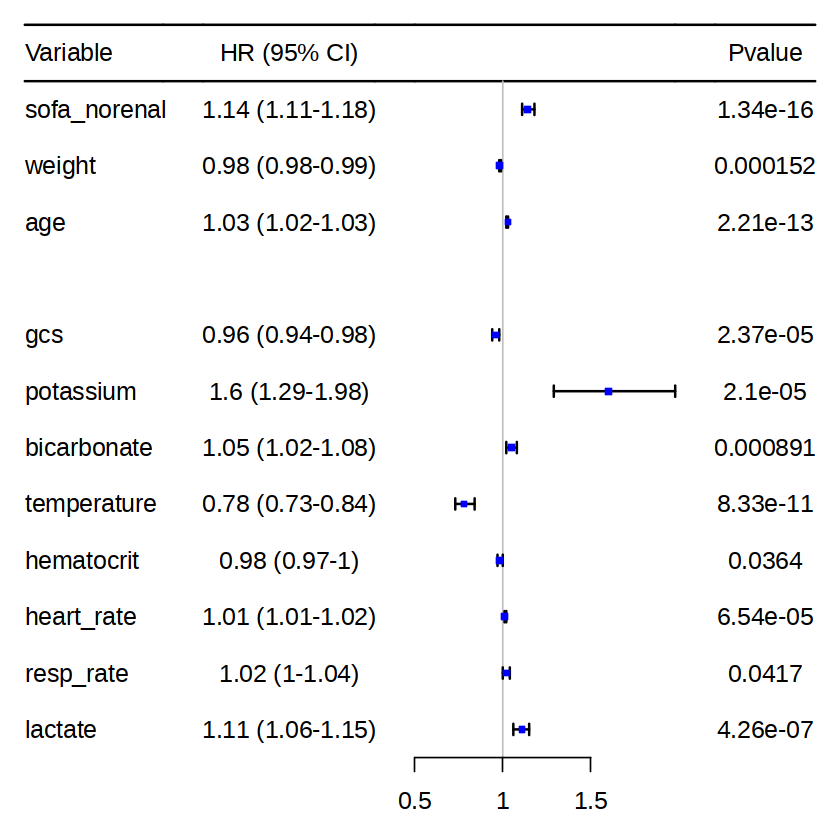

In [ ]:
library(forestplot)
dat=rbind(c("Variable", NA,NA,NA,"HR (95% CI)", "Pvalue"),mulcox_res_filt)
forestplot(dat[,c(1,5,6)], 
           mean=dat[,2],   
           lower=dat[,3], upper=dat[,4], 
           zero=1,         
           boxsize=0.1,      
           graph.pos=3,
           xticks=c(0.5,1,1.5) ,
           txt_gp=fpTxtGp (
             label=gpar(cex=1.2) ,ticks=gpar(cex=1.2)
            ),
           hrzl_lines=list("1" = gpar(lty=1,lwd=1.5)
                           ,"2" = gpar(lty=1,lwd=1.5)
#                            ,"3"= gpar(lty=1,lwd=1.5)
                          ), 
           col=fpColors ( box = 'blue ' ,
                          lines = ' black ' ,
                          zero = "grey" ),
           lwd.zero=1,
           lwd.ci=1.5, 
           lty.ci=7 ,
           ci.vertices.height=0.1   
)